In [ ]:
#Breast Cancer Detection
#Produced by referencing to:
#Build A Complete Project In Machine Learning - Eduonix
#Breast-cancer-wisconsin.data Dataset - UCI

In [2]:
#Importing Libraries
import sys
import numpy
import matplotlib
import pandas
import sklearn

In [3]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Loading the dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
#Name file avaliable from UCI url
names = ['id', 'clump_thickness', 'univorm_cell_size', 'uniform_cell_shape', 'marginal_adhesion', 'single_epithelial_size', 
         'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)

In [9]:
#Preprocess the data
#Exploring data to pick which algo to use
#Replace missing data by telling python to ignore that data by putting -99999
df.replace('?', -99999, inplace=True)
print(df.axes)

#Drop id as it may affect the machine learning algo
df.drop(['id'], 1, inplace=True)

#Print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'univorm_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [11]:
# Dataset visualization
print(df.loc[698])
print(df.describe())
#Class 2 = Non cancerous
#Class 4 = Cancerous

clump_thickness            4
univorm_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single_epithelial_size     4
bare_nuclei                5
bland_chromatin           10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object
       clump_thickness  univorm_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatin  \
count         699.000000      

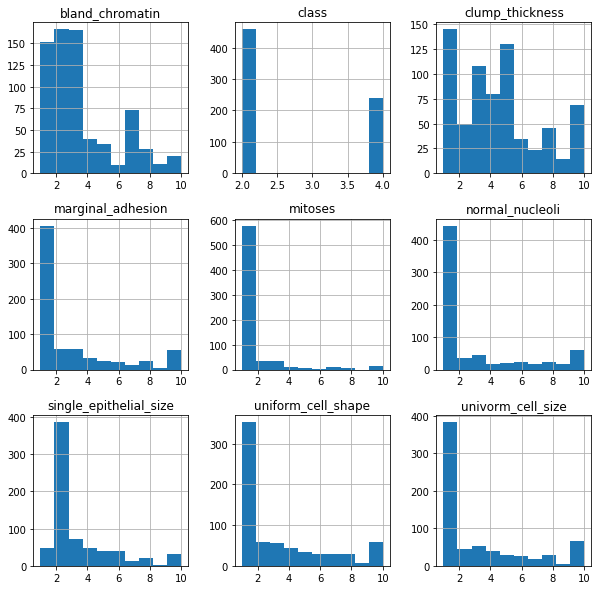

In [12]:
#Plot histograms for each variable to better understand the data
df.hist(figsize = (10,10))
plt.show()
#Most graphs skewed to the left

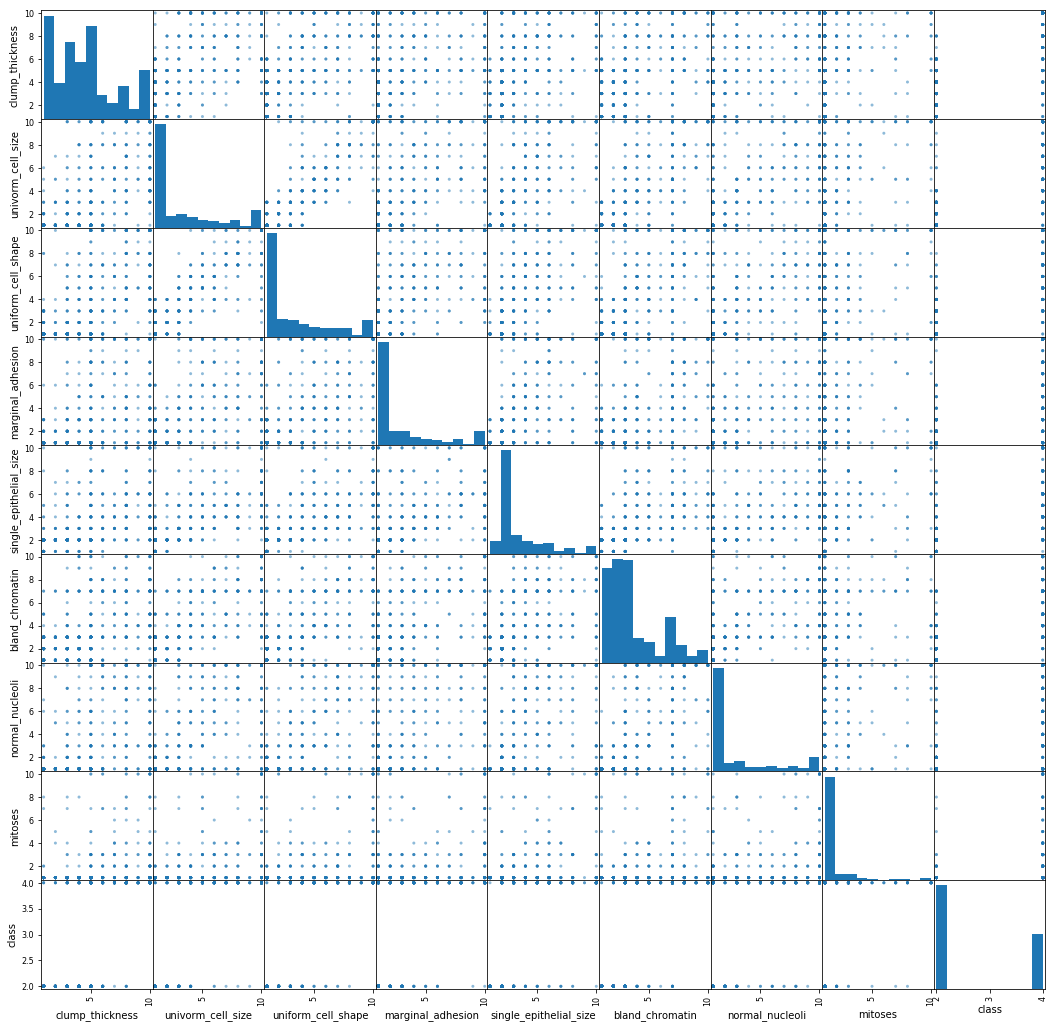

In [13]:
#Create scatter plot matrix
#Show the relation of each varible to the other variables
scatter_matrix(df, figsize = (18, 18))
plt.show()

In [14]:
#Create X and Y datasets for training and validation
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [15]:
# Specify testing options
# Seed enable us to reproduce the result
seed = 8
scoring = 'accuracy'

In [ ]:
#K-nearest neighbors algorithm
#In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.[1] In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

#In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
#In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.

#Source https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

#Support-vector machine
#In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier

In [17]:
#Define the models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

#Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

#KNN perform slighly better than SVM

KNN: 0.960617 (0.023751)
SVM: 0.951753 (0.025278)


In [20]:
# Make prediction on validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
#Finding
#Precision refer to false postive and SVM have a higher chance of false positive  
#Recall refer to false negative

KNN
0.9714285714285714
             precision    recall  f1-score   support

          2       0.98      0.98      0.98        90
          4       0.96      0.96      0.96        50

avg / total       0.97      0.97      0.97       140

SVM
0.9714285714285714
             precision    recall  f1-score   support

          2       0.99      0.97      0.98        90
          4       0.94      0.98      0.96        50

avg / total       0.97      0.97      0.97       140



In [21]:
#Prediction = false positive
#Minimise false positive on cancer patients


In [23]:
#Build our own cell and explore what it takes to be label as class 4 on the number 9 classification
clf = SVC()

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)


0.9714285714285714
[4]
